In [1]:
# Upload the local data file to colab
from google.colab import files
uploaded = files.upload()

Saving prediction20.csv to prediction20.csv


In [2]:
# Installation of necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install geneview
!pip install gprofiler-official
!pip install statsmodels
!pip install scikit-learn
!pip install lifelines
!pip install gseapy
!pip install scikit-learn==1.5.2
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geneview: filename=geneview-0.2.1-py3-none-any.whl size=54470 sha256=46e17fc4cc208d069858cb1d7b38319b0d0994d8e02c4d03c83cf7ac2ef99b42
  Stored in directory: /root/.cache/pip/wheels/91/cb/65/81dafd0254adb97b0938e9c3da9c2c74a8e6169e4595437ca7
Successfully built geneview
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d0ca1d3cedbb7724204363988071fbcf856cd06fe658bff88f3a890c0e6edd34
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 23.0 MB/s eta 0:00:00


In [3]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geneview
from gprofiler import GProfiler
import statsmodels.api as sm
from sklearn import datasets, model_selection, metrics
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Read the data in the glioma_mskcc_2019_clinical_data_simpler.csv file into a dataframe

prediction = pd.read_csv('prediction20.csv', sep=",")


In [12]:
prediction

,Patient ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,...,Meth_LGm5,Meth_LGm6,Type_astrocytoma,Type_glioblastoma,Type_oligoastrocytoma,Type_oligodendroglioma,Diagnosis Age,TMB (nonsynonymous),Overall Survival (Months),Overall Survival Status
0,TCGA-02-0003,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.480000,0.106101,4.7,1
1,TCGA-02-0033,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.533333,0.053050,2.8,1
2,TCGA-02-0047,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.853333,0.119363,14.7,1
3,TCGA-02-0055,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0.640000,0.108753,2.5,1
4,TCGA-02-2470,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0.573333,0.111406,12.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,TCGA-P5-A730,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.106667,0.045093,0.2,0
691,TCGA-QH-A65X,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.186667,0.042440,7.8,0
692,TCGA-S9-A6TY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.480000,0.031830,22.5,0
693,TCGA-S9-A7QY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.280000,0.047745,18.2,0


In [13]:
prediction.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2', 'Meth_LGm3',
       'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Type_astrocytoma',
       'Type_glioblastoma', 'Type_oligoastrocytoma', 'Type_oligodendroglioma',
       'Diagnosis Age', 'TMB (nonsynonymous)', 'Overall Survival (Months)',
       'Overall Survival Status'],
      dtype='object')

Dropping Age at diagnosis to explore other features

In [14]:
# Create a new DataFrame with 'Diagnosis Age' removed
prediction_no_age = prediction.drop(columns=['Diagnosis Age', 'Overall Survival (Months)'])

# Verify the new DataFrame
print("Columns in prediction_no_age DataFrame:", prediction_no_age.columns)

Columns in prediction_no_age DataFrame: Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2', 'Meth_LGm3',
       'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Type_astrocytoma',
       'Type_glioblastoma', 'Type_oligoastrocytoma', 'Type_oligodendroglioma',
       'TMB (nonsynonymous)', 'Overall Survival Status'],
      dtype='object')


In [15]:
print("Unique values in Overall Survival Status:", prediction_no_age['Overall Survival Status'].unique())


Unique values in Overall Survival Status: [1 0]


In [16]:
from sklearn.utils.class_weight import compute_sample_weight

# Calculate sample weights for the modified DataFrame
sample_weights = compute_sample_weight('balanced', prediction_no_age['Overall Survival Status'])


In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.utils.class_weight import compute_sample_weight

# Define features (X) and target variable (y) while retaining Patient ID
X = prediction_no_age.drop(columns=['Overall Survival Status'])
y = prediction_no_age['Overall Survival Status']

# Step 1: Calculate Sample Weights
sample_weights = compute_sample_weight('balanced', y)

# Step 2: Apply each feature selection method

# 2a. Calculate Weight of Evidence (WoE) for each feature
def calculate_woe(feature, target):
    feature_data = pd.crosstab(feature, target, normalize='columns')
    woe = np.log((feature_data[1] + 1e-5) / (feature_data[0] + 1e-5))
    return abs(woe.sum())

woe_importance = [calculate_woe(X[feature], y) for feature in X.columns.drop('Patient ID')]
woe_threshold = 0.1  # Adjust as needed
woe_selected = [woe >= woe_threshold for woe in woe_importance]

# 2b. RFE with Logistic Regression using sample weights
rfe_lr = RFE(estimator=LogisticRegression(max_iter=1000, class_weight='balanced'))
rfe_lr.fit(X.drop(columns=['Patient ID']), y, sample_weight=sample_weights)

# 2c. Random Forest for feature importance using sample weights
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X.drop(columns=['Patient ID']), y, sample_weight=sample_weights)
rf_importances = rf.feature_importances_
rf_selected = rf_importances > 0.01  # Adjust threshold as needed

# 2d. LASSO for feature selection using sample weights
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X.drop(columns=['Patient ID']), y, sample_weight=sample_weights)
lasso_importances = lasso.coef_
lasso_selected = lasso_importances != 0

# Step 3: Combine selections with voting (at least three methods)
selected_features = pd.DataFrame({
    'Feature': X.columns.drop('Patient ID'),
    'WoE_Importance': woe_selected,
    'RFE_LR': rfe_lr.support_,
    'RF_Importance': rf_selected,
    'LASSO_Importance': lasso_selected
})

# Voting rule: Retain features selected by at least three methods
selected_features['Selected'] = (
    selected_features[['WoE_Importance', 'RFE_LR', 'RF_Importance', 'LASSO_Importance']].sum(axis=1) >= 3
)

# Final list of selected features, including Patient ID for tracking
final_selected_features = ['Patient ID'] + selected_features[selected_features['Selected']]['Feature'].tolist()

# Print the final list and count
print("Final selected features:", final_selected_features)
print(f"Number of selected features: {len(final_selected_features) - 1}")  # Exclude 'Patient ID'


Final selected features: ['Patient ID', 'IDH1', 'EGFR', 'Grade_G2', 'Grade_G4', 'Meth_LGm2', 'Meth_LGm3', 'Meth_LGm4', 'Meth_LGm5', 'Type_glioblastoma', 'TMB (nonsynonymous)']
Number of selected features: 10


In [45]:
# Count the number of patients with TP53 mutations
tp53_mutations_count = prediction_no_age['TP53'].sum()
total_patients = prediction_no_age['Patient ID'].nunique()

# Display results
print(f"Number of patients with TP53 mutations: {tp53_mutations_count}")
print(f"Total number of patients: {total_patients}")
print(f"Percentage of patients with TP53 mutations: {tp53_mutations_count / total_patients * 100:.2f}%")


Number of patients with TP53 mutations: 53
Total number of patients: 695
Percentage of patients with TP53 mutations: 7.63%


In [46]:
# Compute correlation matrix for selected gene features, including TP53
gene_columns = [col for col in prediction_no_age.columns if col != 'Patient ID' and col != 'Overall Survival Status']
correlation_matrix = prediction_no_age[gene_columns].corr()

# Display correlations of TP53 with other genes
tp53_correlations = correlation_matrix['TP53'].sort_values(ascending=False)
print("TP53 Correlations with Other Genes:")
print(tp53_correlations)


TP53 Correlations with Other Genes:
TP53                      1.000000
Meth_LGm6                 0.106229
Meth_LGm1                 0.095336
Type_glioblastoma         0.083023
Grade_G4                  0.083023
Sex                       0.046057
TMB (nonsynonymous)       0.033997
Type_astrocytoma          0.016048
Meth_LGm5                 0.012302
Meth_LGm2                -0.000951
FUBP1                    -0.010907
NOTCH1                   -0.010907
RYR2                     -0.024459
RB1                      -0.024459
LRP2                     -0.026812
CIC                      -0.026812
ATRX                     -0.026812
PCLO                     -0.032910
PKHD1                    -0.032910
Meth_LGm4                -0.035475
MUC16                    -0.036437
Grade_G3                 -0.036817
PIK3R1                   -0.038085
TTN                      -0.038085
Type_oligoastrocytoma    -0.038453
FLG                      -0.039669
HMCN1                    -0.039669
PIK3CA             

In [47]:
# Define the genes of interest
genes_of_interest = ['ATRX', 'TP53', 'IDH1']

# Calculate the mutation count and percentage for each gene
mutation_counts = prediction_no_age[genes_of_interest].sum()
total_patients = prediction_no_age['Patient ID'].nunique()

# Create a DataFrame with the results
mutation_summary = pd.DataFrame({
    'Gene': genes_of_interest,
    'Mutation Count': mutation_counts.values,
    'Mutation Percentage': (mutation_counts / total_patients * 100).values
})

# Display the results
print("Mutation Summary for ATRX, TP53, and IDH1:")
print(mutation_summary)


Mutation Summary for ATRX, TP53, and IDH1:
   Gene  Mutation Count  Mutation Percentage
0  ATRX               6             0.863309
1  TP53              53             7.625899
2  IDH1             335            48.201439


In [48]:
# Create a new DataFrame with only the genes of interest
gene_mutations = prediction_no_age[['ATRX', 'TP53', 'IDH1']]

# Count the number of mutations per patient in these genes
gene_mutations['Mutation Count'] = gene_mutations.sum(axis=1)

# Calculate percentages of patients with 1, 2, or 3 mutations
mutation_summary = gene_mutations['Mutation Count'].value_counts(normalize=True).sort_index() * 100

# Display results
print("Percentage of Patients with Mutations in 1, 2, or 3 Genes:")
print(mutation_summary)


Percentage of Patients with Mutations in 1, 2, or 3 Genes:
Mutation Count
0    43.309353
1    56.690647
Name: proportion, dtype: float64


<ipython-input-48-5203b687e9a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_mutations['Mutation Count'] = gene_mutations.sum(axis=1)


In [49]:
# Define conditions for each mutation combination
only_tp53 = (gene_mutations['TP53'] == 1) & (gene_mutations['ATRX'] == 0) & (gene_mutations['IDH1'] == 0)
only_atrx = (gene_mutations['ATRX'] == 1) & (gene_mutations['TP53'] == 0) & (gene_mutations['IDH1'] == 0)
only_idh1 = (gene_mutations['IDH1'] == 1) & (gene_mutations['TP53'] == 0) & (gene_mutations['ATRX'] == 0)

tp53_atrx = (gene_mutations['TP53'] == 1) & (gene_mutations['ATRX'] == 1) & (gene_mutations['IDH1'] == 0)
tp53_idh1 = (gene_mutations['TP53'] == 1) & (gene_mutations['IDH1'] == 1) & (gene_mutations['ATRX'] == 0)
atrx_idh1 = (gene_mutations['ATRX'] == 1) & (gene_mutations['IDH1'] == 1) & (gene_mutations['TP53'] == 0)

all_three = (gene_mutations['ATRX'] == 1) & (gene_mutations['TP53'] == 1) & (gene_mutations['IDH1'] == 1)

# Calculate the percentages
total_patients = len(gene_mutations)
mutation_combinations = {
    "TP53 only": only_tp53.sum() / total_patients * 100,
    "ATRX only": only_atrx.sum() / total_patients * 100,
    "IDH1 only": only_idh1.sum() / total_patients * 100,
    "TP53 + ATRX": tp53_atrx.sum() / total_patients * 100,
    "TP53 + IDH1": tp53_idh1.sum() / total_patients * 100,
    "ATRX + IDH1": atrx_idh1.sum() / total_patients * 100,
    "All three": all_three.sum() / total_patients * 100
}

# Display results
mutation_combinations_df = pd.DataFrame(list(mutation_combinations.items()), columns=['Combination', 'Percentage'])
print(mutation_combinations_df)


   Combination  Percentage
0    TP53 only    7.625899
1    ATRX only    0.863309
2    IDH1 only   48.201439
3  TP53 + ATRX    0.000000
4  TP53 + IDH1    0.000000
5  ATRX + IDH1    0.000000
6    All three    0.000000


In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Define features (X) and target variable (y) with Patient ID for traceability
X = prediction_no_age.drop(columns=['Overall Survival Status', 'Patient ID'])
y = prediction_no_age['Overall Survival Status']

# Compute sample weights for imbalance
sample_weights = compute_sample_weight('balanced', y)

# Define models with appropriate class balancing
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=sample_weights.sum()/len(sample_weights))

# Fit models
gb_model.fit(X, y, sample_weight=sample_weights)
lr_model.fit(X, y, sample_weight=sample_weights)
rf_model.fit(X, y, sample_weight=sample_weights)
xgb_model.fit(X, y, sample_weight=sample_weights)

# Extract feature importances
gb_importances = gb_model.feature_importances_
lr_importances = np.abs(lr_model.coef_[0])
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Compile feature importances into a DataFrame for diagnostics
selected_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Gradient Boosting': gb_importances,
    'Logistic Regression': lr_importances,
    'Random Forest': rf_importances,
    'XGBoost': xgb_importances
})

# Set per-model thresholds
gb_threshold = 0.02
lr_threshold = 0.05
rf_threshold = 0.05
xgb_threshold = 0.02

# Diagnostic Output
print("Before Voting:")
print(selected_features_df)

# Voting rule with strict per-model thresholds
selected_features_df['Selected'] = (
    (selected_features_df['Gradient Boosting'] > gb_threshold).astype(int) +
    (selected_features_df['Logistic Regression'] > lr_threshold).astype(int) +
    (selected_features_df['Random Forest'] > rf_threshold).astype(int) +
    (selected_features_df['XGBoost'] > xgb_threshold).astype(int)
) >= 3

# Display final selected features after voting
final_selected_features = ['Patient ID'] + selected_features_df[selected_features_df['Selected']]['Feature'].tolist()

print("After Voting and Thresholds:")
print(selected_features_df[selected_features_df['Selected']])  # For verification

# Ensure TP53 is included in final selected features if not automatically selected
if 'TP53' not in final_selected_features:
    final_selected_features.append('TP53')

# Display the final list and count
print("Final selected features:", final_selected_features)
print(f"Number of selected features: {len(final_selected_features) - 1}")  # Exclude 'Patient ID'


Before Voting:
                   Feature  Gradient Boosting  Logistic Regression  \
0                     IDH1           0.139909             0.155236   
1                     TP53           0.002577             0.138054   
2                     ATRX           0.004396             0.194185   
3                     PTEN           0.008882             0.037837   
4                      TTN           0.017136             0.649433   
5                     EGFR           0.018098             0.393087   
6                      CIC           0.010102             0.051835   
7                    MUC16           0.000000             0.132862   
8                   PIK3CA           0.004129             0.680258   
9                      NF1           0.008166             0.366157   
10                    RYR2           0.002474             0.381721   
11                   FUBP1           0.000000             0.171801   
12                  PIK3R1           0.018739             1.180862   
13   

In [51]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_sample_weight

# Define features (X) and target variable (y)
X = prediction_no_age.drop(columns=['Patient ID', 'Overall Survival Status'])
y = prediction_no_age['Overall Survival Status']

# Apply sample weighting for class imbalance
sample_weights = compute_sample_weight('balanced', y)


In [52]:
# Define features (X) and target variable (y)
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])  # Ensures selected features are used
y = prediction_no_age['Overall Survival Status']


In [53]:
# Initialize Random Forest model with sample weighting
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy', fit_params={'sample_weight': sample_weights})
print("Random Forest CV Accuracy:", rf_scores.mean(), "±", rf_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Random Forest CV Accuracy: 0.7008902691511387 ± 0.13153015528318204


In [54]:
# Initialize SVM model with sample weighting
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
svm_scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy', fit_params={'sample_weight': sample_weights})
print("SVM CV Accuracy:", svm_scores.mean(), "±", svm_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


SVM CV Accuracy: 0.6289648033126294 ± 0.1475688167887713


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define features (X) and target variable (y)
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])  # Ensures selected features are used
y = prediction_no_age['Overall Survival Status']

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=6)  # Adjust n_neighbors if needed

# Perform cross-validation to evaluate KNN
knn_scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("KNN cross-validation scores for each fold:", knn_scores)
print("Mean cross-validation accuracy for KNN:", knn_scores.mean())
print("Standard deviation of cross-validation accuracy for KNN:", knn_scores.std())


KNN cross-validation scores for each fold: [0.45714286 0.52857143 0.88571429 0.75714286 0.82857143 0.69565217
 0.66666667 0.66666667 0.82608696 0.75362319]
Mean cross-validation accuracy for KNN: 0.7065838509316771
Standard deviation of cross-validation accuracy for KNN: 0.12776309445501371


In [56]:
# Initialize Gradient Boosting model with sample weighting
gb_model = GradientBoostingClassifier(random_state=42)
gb_scores = cross_val_score(gb_model, X, y, cv=10, scoring='accuracy', fit_params={'sample_weight': sample_weights})
print("Gradient Boosting CV Accuracy:", gb_scores.mean(), "±", gb_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Gradient Boosting CV Accuracy: 0.7152795031055901 ± 0.1635590271643491


In [59]:
# Initialize Logistic Regression model with class weights
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy', fit_params={'sample_weight': sample_weights})
print("Logistic Regression CV Accuracy:", lr_scores.mean(), "±", lr_scores.std())


Logistic Regression CV Accuracy: 0.6418426501035197 ± 0.159193634418505


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


In [63]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define features (X) and target variable (y)
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])
y = prediction_no_age['Overall Survival Status']

# Initialize individual models
knn_model = KNeighborsClassifier(n_neighbors=6)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Create the ensemble model with soft voting
ensemble_model5 = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('logreg', lr_model),
        ('adaboost', ada_model),
        ('svm', svm_model),
        ('randomforest', rf_model)
    ],
    voting='soft'
)

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(ensemble_model5, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Ensemble Voting Classifier cross-validation scores for each fold:", ensemble_scores)
print("Mean cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.mean())
print("Standard deviation of cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Ensemble Voting Classifier cross-validation scores for each fold: [0.42857143 0.51428571 0.94285714 0.91428571 0.95714286 0.73913043
 0.69565217 0.68115942 0.84057971 0.71014493]
Mean cross-validation accuracy for Ensemble Voting Classifier: 0.7423809523809524
Standard deviation of cross-validation accuracy for Ensemble Voting Classifier: 0.16822391585120772


In [69]:
from sklearn.metrics import make_scorer, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Evaluate the ensemble model using cross-validation for F1-score and AUC-ROC
f1_scorer = make_scorer(f1_score)
auc_roc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Cross-validation for F1-score
f1_scores = cross_val_score(ensemble_model5, X, y, cv=10, scoring=f1_scorer)
print("Ensemble Voting Classifier cross-validation F1 scores for each fold:", f1_scores)
print("Mean cross-validation F1-score for Ensemble Voting Classifier:", f1_scores.mean())
print("Standard deviation of cross-validation F1-score for Ensemble Voting Classifier:", f1_scores.std())

# Cross-validation for AUC-ROC
auc_roc_scores = cross_val_score(ensemble_model5, X, y, cv=10, scoring=auc_roc_scorer)
print("Ensemble Voting Classifier cross-validation AUC-ROC scores for each fold:", auc_roc_scores)
print("Mean cross-validation AUC-ROC for Ensemble Voting Classifier:", auc_roc_scores.mean())
print("Standard deviation of cross-validation AUC-ROC for Ensemble Voting Classifier:", auc_roc_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm

Ensemble Voting Classifier cross-validation F1 scores for each fold: [0.52380952 0.56410256 0.9047619  0.86956522 0.93617021 0.35714286
 0.16       0.21428571 0.7027027  0.64285714]
Mean cross-validation F1-score for Ensemble Voting Classifier: 0.5875397839819672
Standard deviation of cross-validation F1-score for Ensemble Voting Classifier: 0.26416592580867615


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Ensemble Voting Classifier cross-validation AUC-ROC scores for each fold: [0.56475486 0.59158187 0.95929695 0.9666975  0.98334875 0.88516068
 0.73204159 0.63279773 0.87137331 0.82253385]
Mean cross-validation AUC-ROC for Ensemble Voting Classifier: 0.8009587082667563
Standard deviation of cross-validation AUC-ROC for Ensemble Voting Classifier: 0.15197985137062117


In [64]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define features (X) and target variable (y)
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])
y = prediction_no_age['Overall Survival Status']

# Initialize individual models
knn_model = KNeighborsClassifier(n_neighbors=6)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Create the ensemble model with soft voting
ensemble_model3 = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('svm', svm_model),
        ('gradientboosting', gb_model)
    ],
    voting='soft'
)

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(ensemble_model3, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Ensemble Voting Classifier cross-validation scores for each fold:", ensemble_scores)
print("Mean cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.mean())
print("Standard deviation of cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.std())


Ensemble Voting Classifier cross-validation scores for each fold: [0.4        0.5        0.92857143 0.9        0.91428571 0.72463768
 0.69565217 0.66666667 0.82608696 0.75362319]
Mean cross-validation accuracy for Ensemble Voting Classifier: 0.7309523809523809
Standard deviation of cross-validation accuracy for Ensemble Voting Classifier: 0.16706081629614247


In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, classification_report

# Perform cross-validation predictions for 3
y_pred = cross_val_predict(ensemble_model3, X, y, cv=10, method='predict_proba')[:, 1]
y_pred_class = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary class predictions

# Evaluate metrics
accuracy = accuracy_score(y, y_pred_class)
precision = precision_score(y, y_pred_class)
f1 = f1_score(y, y_pred_class)
roc_auc = roc_auc_score(y, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y, y_pred_class))


Accuracy: 0.7309352517985611
Precision: 0.5927601809954751
F1-Score: 0.5835189309576837
ROC-AUC Score: 0.7520943686840226

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       467
           1       0.59      0.57      0.58       228

    accuracy                           0.73       695
   macro avg       0.69      0.69      0.69       695
weighted avg       0.73      0.73      0.73       695



In [67]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, classification_report

# Perform cross-validation predictions for 5
y_pred = cross_val_predict(ensemble_model5, X, y, cv=10, method='predict_proba')[:, 1]
y_pred_class = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary class predictions

# Evaluate metrics
accuracy = accuracy_score(y, y_pred_class)
precision = precision_score(y, y_pred_class)
f1 = f1_score(y, y_pred_class)
roc_auc = roc_auc_score(y, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y, y_pred_class))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy: 0.7424460431654676
Precision: 0.6008230452674898
F1-Score: 0.6199575371549894
ROC-AUC Score: 0.7541417784289417

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       467
           1       0.60      0.64      0.62       228

    accuracy                           0.74       695
   macro avg       0.71      0.72      0.71       695
weighted avg       0.75      0.74      0.74       695



In [72]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(ensemble_model5, X_resampled, y_resampled, cv=10, scoring='accuracy')
y_pred = cross_val_predict(ensemble_model5, X_resampled, y_resampled, cv=10, method='predict')
y_pred_proba = cross_val_predict(ensemble_model5, X_resampled, y_resampled, cv=10, method='predict_proba')[:, 1]

# Print cross-validation accuracy
print("Ensemble Voting Classifier cross-validation scores for each fold:", ensemble_scores)
print("Mean cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.mean())
print("Standard deviation of cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.std())

# Print classification report and F1-score
print("Classification Report:")
print(classification_report(y_resampled, y_pred))

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_resampled, y_pred_proba)
print(f"Mean cross-validation AUC-ROC for Ensemble Voting Classifier: {auc_roc:.4f}")

# Calculate F1-score
f1 = f1_score(y_resampled, y_pred)
print(f"Mean cross-validation F1-Score for Ensemble Voting Classifier: {f1:.4f}")

from sklearn.metrics import make_scorer, precision_score

# Evaluate the ensemble model using cross-validation for precision
precision_scorer = make_scorer(precision_score, average='macro')

# Cross-validation for precision
precision_scores = cross_val_score(ensemble_model5, X_resampled, y_resampled, cv=10, scoring=precision_scorer)
print("Ensemble Voting Classifier cross-validation precision scores for each fold:", precision_scores)
print("Mean cross-validation precision for Ensemble Voting Classifier:", precision_scores.mean())
print("Standard deviation of cross-validation precision for Ensemble Voting Classifier:", precision_scores.std())








/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Ensemble Voting Classifier cross-validation scores for each fold: [0.80434783 0.84782609 0.82608696 0.80434783 0.80434783 0.54347826
 0.6        0.57777778 0.75555556 0.66666667]
Mean cross-validation accuracy for Ensemble Voting Classifier: 0.7230434782608696
Standard deviation of cross-validation accuracy for Ensemble Voting Classifier: 0.10896821435766178
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       228
           1       0.71      0.76      0.73       228

    accuracy                           0.72       456
   macro avg       0.72      0.72      0.72       456
weighted avg       0.72      0.72      0.72       456

Mean cross-validation AUC-ROC for Ensemble Voting Classifier: 0.7744
Mean cross-validation F1-Score for Ensemble Voting Classifier: 0.7331


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Ensemble Voting Classifier cross-validation precision scores for each fold: [0.83541667 0.86507937 0.83625731 0.859375   0.859375   0.54791667
 0.61175115 0.63345865 0.75595238 0.71791444]
Mean cross-validation precision for Ensemble Voting Classifier: 0.7522496626499546
Standard deviation of cross-validation precision for Ensemble Voting Classifier: 0.11245086965763146


In [75]:
import pandas as pd

# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_count = 1
combined_val_X = pd.DataFrame()
combined_val_y = pd.Series()

for train_index, test_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Train the ensemble model on the training folds
    ensemble_model5.fit(X_train, y_train)

    # Combine the last few folds for a more balanced validation set
    if fold_count >= 9:  # Combine folds 9 and 10
        combined_val_X = pd.concat([combined_val_X, X_val])
        combined_val_y = pd.concat([combined_val_y, y_val])

    fold_count += 1

# Check class distribution in the combined holdout set
print("Class distribution in the combined holdout set:")
print(combined_val_y.value_counts())

# Predict on the combined holdout set
y_pred_combined = ensemble_model5.predict(combined_val_X)
y_pred_proba_combined = ensemble_model5.predict_proba(combined_val_X)[:, 1]

# Evaluate the model on the combined holdout set
print("\nClassification Report for Combined Holdout Set:")
print(classification_report(combined_val_y, y_pred_combined))
print(f"AUC-ROC Score for Combined Holdout Set: {roc_auc_score(combined_val_y, y_pred_proba_combined):.4f}")
print(f"F1-Score for Combined Holdout Set: {f1_score(combined_val_y, y_pred_combined):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Class distribution in the combined holdout set:
0    94
1    44
Name: count, dtype: int64

Classification Report for Combined Holdout Set:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        94
           1       0.72      0.64      0.67        44

    accuracy                           0.80       138
   macro avg       0.78      0.76      0.77       138
weighted avg       0.80      0.80      0.80       138

AUC-ROC Score for Combined Holdout Set: 0.8461
F1-Score for Combined Holdout Set: 0.6747


In [76]:
# Train the ensemble model on the entire dataset
ensemble_model5.fit(X, y)

# Make predictions on the same dataset to observe performance (not for evaluation, just to ensure it runs smoothly)
y_pred_full = ensemble_model5.predict(X)
y_pred_proba_full = ensemble_model5.predict_proba(X)[:, 1]

# Print basic evaluation metrics
from sklearn.metrics import classification_report, roc_auc_score, f1_score

print("Classification Report for Full Dataset:")
print(classification_report(y, y_pred_full))

# Calculate and print AUC-ROC and F1-score
auc_roc_full = roc_auc_score(y, y_pred_proba_full)
f1_full = f1_score(y, y_pred_full)

print(f"AUC-ROC Score for Full Dataset: {auc_roc_full:.4f}")
print(f"F1-Score for Full Dataset: {f1_full:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report for Full Dataset:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       467
           1       0.69      0.75      0.72       228

    accuracy                           0.81       695
   macro avg       0.78      0.79      0.79       695
weighted avg       0.81      0.81      0.81       695

AUC-ROC Score for Full Dataset: 0.9043
F1-Score for Full Dataset: 0.7197


Feature extraction

In [86]:
# Access models directly from the ensemble
rf_model = ensemble_model5.named_estimators_['randomforest']
lr_model = ensemble_model5.named_estimators_['logreg']
ada_model = ensemble_model5.named_estimators_['adaboost']
svm_model = ensemble_model5.named_estimators_['svm']
knn_model = ensemble_model5.named_estimators_['knn']


In [87]:
# Ensure each model is fitted to the training data (X and y)
rf_model.fit(X, y)
lr_model.fit(X, y)
ada_model.fit(X, y)
svm_model.fit(X, y)
knn_model.fit(X, y)

print("All models are now fitted.")


All models are now fitted.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest Feature Importances:
               Feature  Importance
5  TMB (nonsynonymous)    0.602349
0                 IDH1    0.118646
2             Grade_G4    0.103694
3            Meth_LGm2    0.064550
1             Grade_G2    0.062942
4     Type_astrocytoma    0.032371
6                 TP53    0.015449


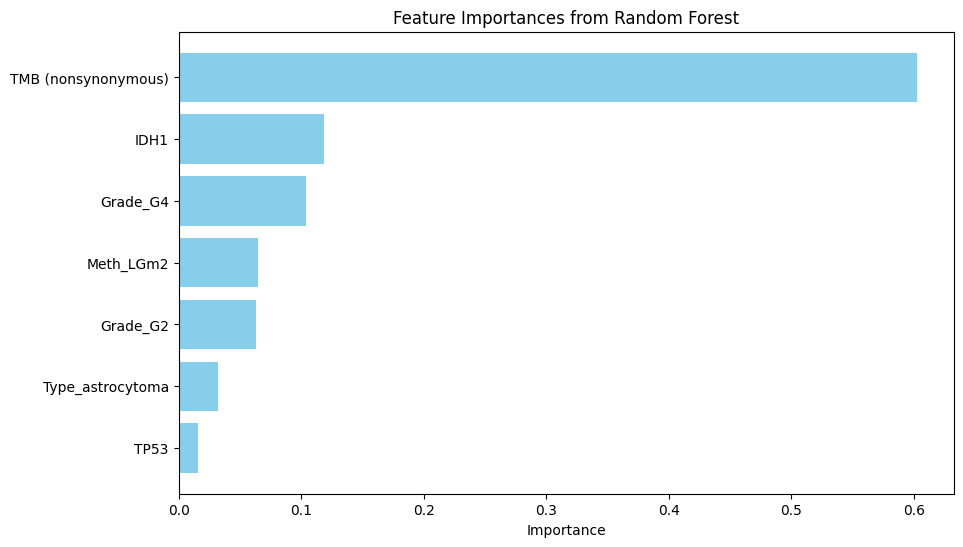

In [93]:
# Extract feature importances from the Random Forest model in the ensemble
rf_model = ensemble_model5.named_estimators_['randomforest']
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_importances)

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_importances['Feature'], rf_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

Logistic Regression Coefficients:
               Feature  Coefficient
2             Grade_G4     0.928209
5  TMB (nonsynonymous)     0.639769
4     Type_astrocytoma    -0.067393
6                 TP53    -0.401784
3            Meth_LGm2    -0.514386
1             Grade_G2    -0.743957
0                 IDH1    -0.874098


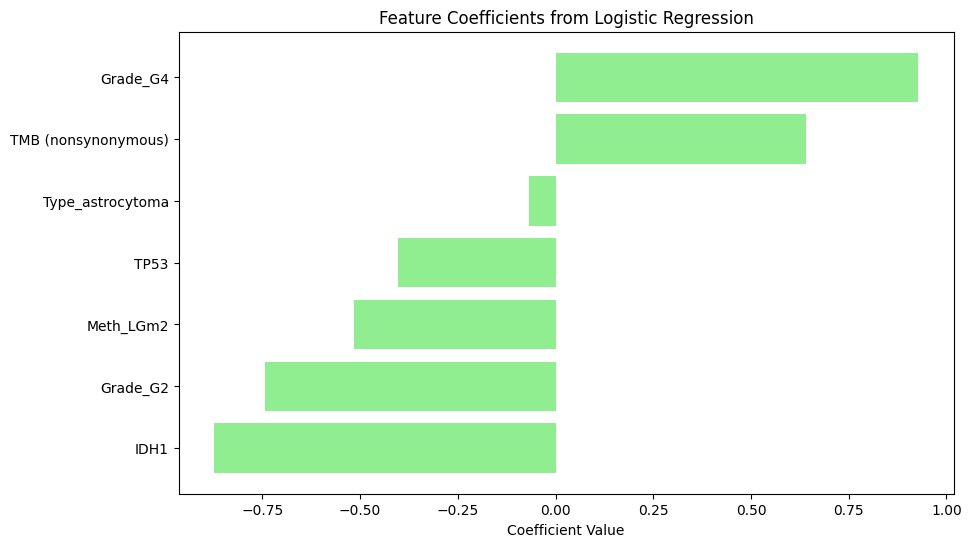

In [94]:
# Extract feature coefficients from Logistic Regression
lr_model = ensemble_model5.named_estimators_['logreg']
lr_importances = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(lr_importances)

# Plot coefficients for Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(lr_importances['Feature'], lr_importances['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()
plt.show()



AdaBoost Feature Importances:
               Feature  Importance
5  TMB (nonsynonymous)        0.80
2             Grade_G4        0.08
0                 IDH1        0.06
1             Grade_G2        0.02
3            Meth_LGm2        0.02
6                 TP53        0.02
4     Type_astrocytoma        0.00


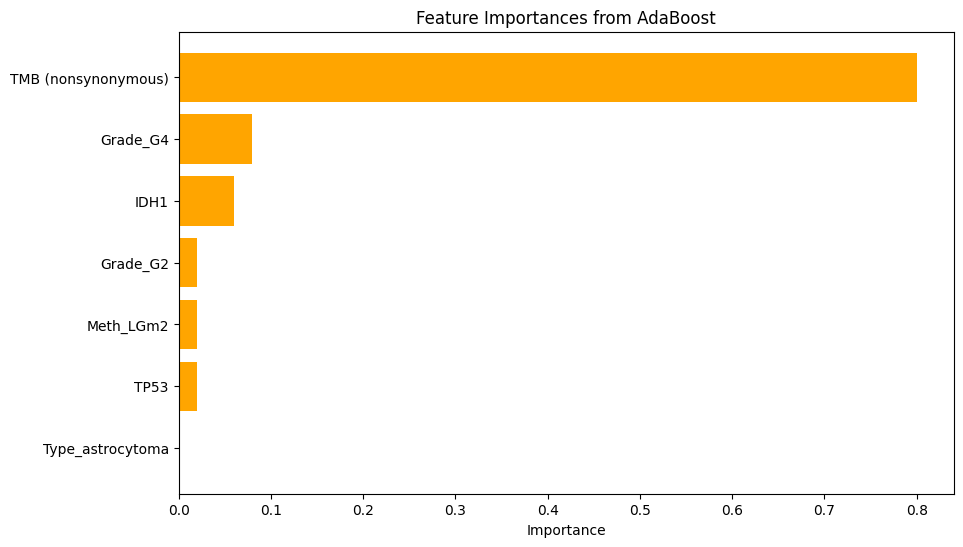

In [95]:
# Extract feature importances from AdaBoost
ada_model = ensemble_model5.named_estimators_['adaboost']
ada_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': ada_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("AdaBoost Feature Importances:")
print(ada_importances)

# Plot feature importances for AdaBoost
plt.figure(figsize=(10, 6))
plt.barh(ada_importances['Feature'], ada_importances['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importances from AdaBoost')
plt.gca().invert_yaxis()
plt.show()



KNN Permutation Importances:
               Feature    Importance
2             Grade_G4  5.870504e-02
0                 IDH1  5.151079e-02
5  TMB (nonsynonymous)  4.690647e-02
6                 TP53  6.762590e-03
4     Type_astrocytoma  6.043165e-03
3            Meth_LGm2  5.755396e-04
1             Grade_G2 -4.440892e-17


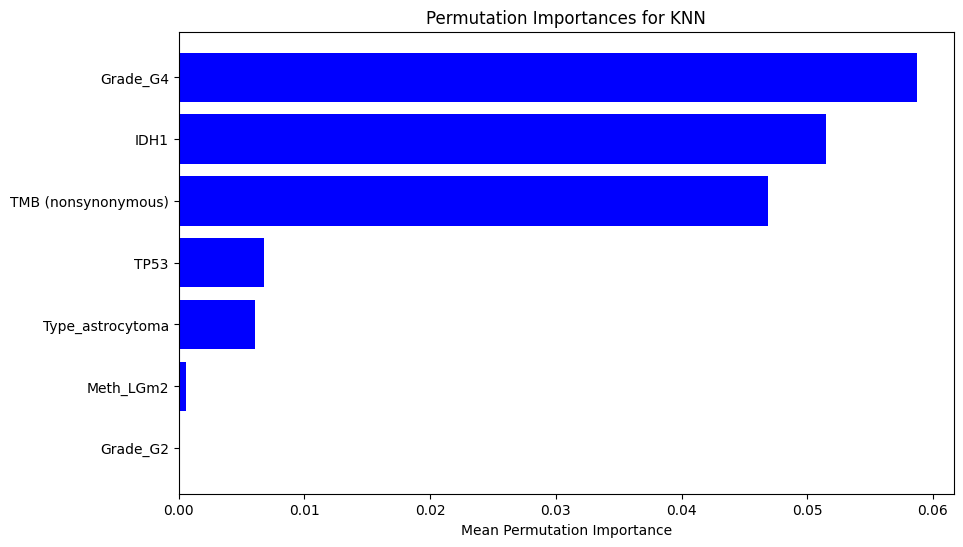

In [99]:
# Calculate permutation importances for KNN
knn_model = ensemble_model5.named_estimators_['knn']
knn_perm_importance = permutation_importance(knn_model, X, y, n_repeats=10, random_state=42)

knn_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': knn_perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("KNN Permutation Importances:")
print(knn_importances)

plt.figure(figsize=(10, 6))
plt.barh(knn_importances['Feature'], knn_importances['Importance'], color='blue')
plt.xlabel('Mean Permutation Importance')
plt.title('Permutation Importances for KNN')
plt.gca().invert_yaxis()
plt.show()




SVC Permutation Importances:
               Feature  Importance
0                 IDH1    0.070360
1             Grade_G2    0.039856
3            Meth_LGm2    0.037410
4     Type_astrocytoma    0.006763
6                 TP53    0.005612
5  TMB (nonsynonymous)    0.001295
2             Grade_G4    0.000000


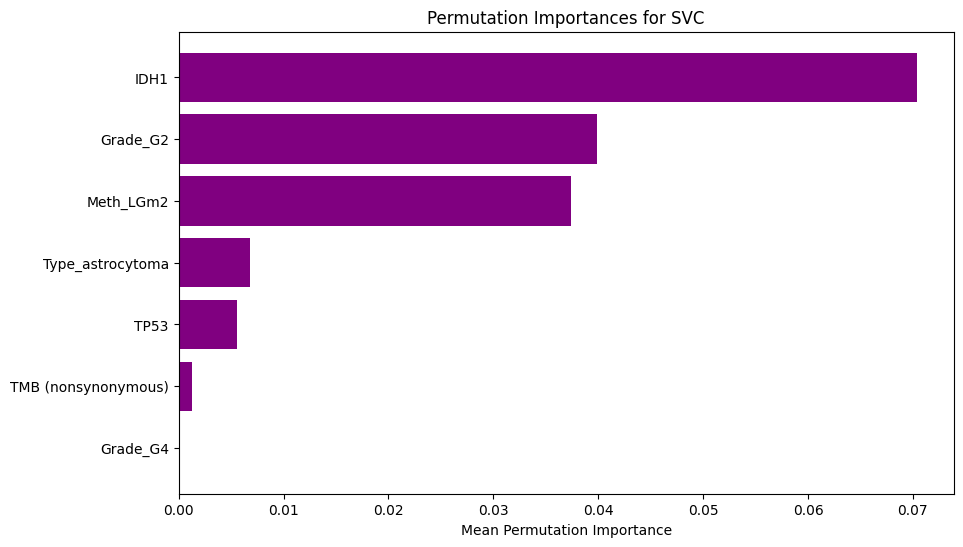

In [98]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances for SVC
svc_model = ensemble_model5.named_estimators_['svm']
svc_perm_importance = permutation_importance(svc_model, X, y, n_repeats=10, random_state=42)

svc_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': svc_perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("SVC Permutation Importances:")
print(svc_importances)

plt.figure(figsize=(10, 6))
plt.barh(svc_importances['Feature'], svc_importances['Importance'], color='purple')
plt.xlabel('Mean Permutation Importance')
plt.title('Permutation Importances for SVC')
plt.gca().invert_yaxis()
plt.show()

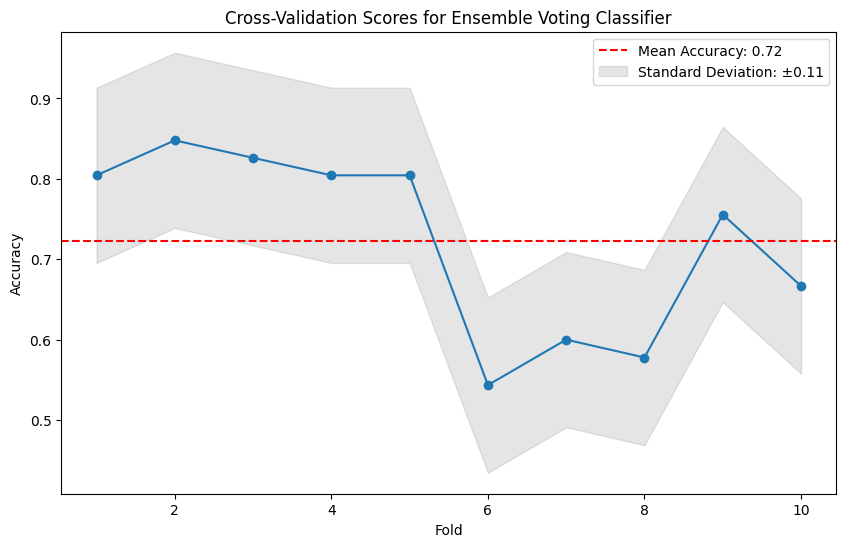

ValueError: Found input variables with inconsistent numbers of samples: [695, 69]

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, PrecisionRecallDisplay

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ensemble_scores) + 1), ensemble_scores, marker='o', linestyle='-')
plt.axhline(y=ensemble_scores.mean(), color='r', linestyle='--', label=f'Mean Accuracy: {ensemble_scores.mean():.2f}')
plt.fill_between(range(1, len(ensemble_scores) + 1),
                 ensemble_scores - ensemble_scores.std(),
                 ensemble_scores + ensemble_scores.std(),
                 color='gray', alpha=0.2, label=f'Standard Deviation: ±{ensemble_scores.std():.2f}')
plt.title("Cross-Validation Scores for Ensemble Voting Classifier")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Ensemble Voting Classifier")
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
disp = PrecisionRecallDisplay.from_predictions(y, y_pred, name="Ensemble Voting Classifier")
plt.title("Precision-Recall Curve for Ensemble Voting Classifier")
plt.show()

# Bar Plot of Model Metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'F1-Score': f1, 'ROC-AUC': roc_auc}
plt.figure(figsize=(8, 6))
plt.barh(list(metrics.keys()), list(metrics.values()), color='skyblue')
plt.xlim(0, 1)
plt.xlabel("Metric Score")
plt.title("Performance Metrics for Ensemble Voting Classifier")
for i, (metric, score) in enumerate(metrics.items()):
    plt.text(score + 0.01, i, f"{score:.2f}", va='center')
plt.show()


In [101]:
import pandas as pd
import numpy as np

# Get feature names
features = X.columns

# Initialize models
logreg = LogisticRegression(class_weight='balanced', random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)

# Fit each model independently
logreg.fit(X, y, sample_weight=sample_weights)
grad_boost.fit(X, y, sample_weight=sample_weights)
ada_boost.fit(X, y, sample_weight=sample_weights)

# Extract feature importances/coefs
logreg_importance = np.abs(logreg.coef_[0])  # Take absolute for coefficients
grad_importance = grad_boost.feature_importances_
ada_importance = ada_boost.feature_importances_

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Logistic Regression Importance': logreg_importance,
    'Gradient Boosting Importance': grad_importance,
    'AdaBoost Importance': ada_importance
})

# Calculate mean importance for an overall view
importance_df['Mean Importance'] = importance_df[['Logistic Regression Importance',
                                                  'Gradient Boosting Importance',
                                                  'AdaBoost Importance']].mean(axis=1)

# Sort by mean importance
importance_df = importance_df.sort_values(by='Mean Importance', ascending=False)

# Display or plot feature importances
print("Feature Importances:")
print(importance_df)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Feature Importances:
               Feature  Logistic Regression Importance  \
5  TMB (nonsynonymous)                        0.835975   
2             Grade_G4                        0.947113   
0                 IDH1                        0.865886   
1             Grade_G2                        0.721906   
3            Meth_LGm2                        0.484023   
6                 TP53                        0.434947   
4     Type_astrocytoma                        0.050103   

   Gradient Boosting Importance  AdaBoost Importance  Mean Importance  
5                      0.367575                 0.80         0.667850  
2                      0.288308                 0.08         0.438474  
0                      0.205582                 0.06         0.377156  
1                      0.040738                 0.02         0.260881  
3                      0.047751                 0.02         0.183925  
6                      0.013074                 0.02         0.156007  
4         

Survival with Cox

In [ ]:
prediction_no_age.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'TMB (nonsynonymous)',
       'Overall Survival Status'],
      dtype='object')

In [ ]:
# Upload the local data file to colab
from google.colab import files
uploaded = files.upload()

Saving lgggbm_tcga_pub_clinical_data_short.csv to lgggbm_tcga_pub_clinical_data_short.csv


In [ ]:
# Read the data in the glioma_mskcc_2019_clinical_data_simpler.csv file into a dataframe

clinical_data = pd.read_csv('lgggbm_tcga_pub_clinical_data_short.csv', sep=",")

In [ ]:
clinical_data.columns

Index(['Patient ID', 'Sample ID', 'Absolute Extract Ploidy', 'Diagnosis Age',
       'ATRX status', 'BCR Status', 'BRAF-KIAA1549 fusion',
       'BRAF V600E status', 'Cancer Type', 'Cancer Type Detailed',
       'Chr 19/20 co-gain', 'Chr 7 gain/Chr 10 loss', 'DAXX status',
       'ESTIMATE combined score', 'ESTIMATE immune score',
       'ESTIMATE stromal score', 'Neoplasm Histologic Grade',
       'Neoplasm Histologic Type Name', 'HM27', 'HM450', 'IDH-1P10Q Subtype',
       'IDH/codel subtype', 'IDH-specific DNA Methylation Cluster',
       'IDH-specific RNA Expression Cluster', 'IDH status', 'Mutation Count',
       'Oncotree Code', 'Original Subtype', 'Overall Survival (Months)',
       'Overall Survival Status', 'Pan-Glioma DNA Methylation Cluster',
       'Pan-Glioma RNA Expression Cluster', 'Percent aneuploidy', 'Sex',
       'Study', 'Telomere length estimate in blood normal (Kb)',
       'Telomere length estimate in tumor (Kb)', 'Telomere Maintenance',
       'TERT expression (

In [ ]:
# Merge clinical_data with prediction_no_age on Patient ID
merged_df = prediction_no_age.merge(
    clinical_data[['Patient ID', 'Overall Survival (Months)']],
    on='Patient ID',
    how='left'
)

# Filter to retain only the rows where Patient ID is in prediction_no_age
merged_df = merged_df[merged_df['Patient ID'].isin(prediction_no_age['Patient ID'])]

# Display the merged DataFrame for verification
print(merged_df.head())


     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     1     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     1     0     0    0     0    0      0       1  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     1     0     1    1     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   PKHD1  LRP2  RB1  Sex  Grade_G2  Grade_G3  Grade_G4  TMB (nonsynonymous)  \
0      0     0    0    1         0         0         1             0.106101   
1      0     0    1    1         0         0         1             0.053050   
2      0     0    0    1         0         0         1             0.119363   
3      0     0    0    0         0         0         1             0.108753   
4      0     0    0    1         0         0         1             0.111406   

   Overall Survival Status  Overall Survival (Mont

In [104]:
prediction.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2', 'Meth_LGm3',
       'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Type_astrocytoma',
       'Type_glioblastoma', 'Type_oligoastrocytoma', 'Type_oligodendroglioma',
       'Diagnosis Age', 'TMB (nonsynonymous)', 'Overall Survival (Months)',
       'Overall Survival Status'],
      dtype='object')

<lifelines.CoxPHFitter: fitted with 695 total observations, 467 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 695
number of events observed = 228
   partial log-likelihood = -1109.06
         time fit was run = 2024-11-04 17:51:55 UTC

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
IDH1                   -0.41      0.67      0.18           -0.76           -0.05                0.47                0.95
TP53                   -0.01      0.99      0.23           -0.46            0.43                0.63                1.53
ATRX                    0.53      1.70      0.57           -0.58            1.64                0.56                5.16
PTEN                    0.12      1.12      0.25           -0.38            0.61                0.69                1.83
EGFR                    0.20      1.23      0.18           -0.15            0.56                0.86                1.74
CIC                    -0.48      0.62      0.74           -1.94            0.98                0.14                2.66
PIK3CA                  0.20      1.22      0.29           -0.37            0.77                0.69                2.15
NF1                     0.39      1.48      0.31           -0.21            0.99                0.81                2.69
RB1                    -0.11      0.89      0.63           -1.36            1.13                0.26                3.09
Sex                     0.18      1.20      0.12           -0.06            0.42                0.94                1.52
Grade_G2               -0.48      0.62      0.20           -0.88           -0.09                0.42                0.92
Grade_G3                0.06      1.06      0.19           -0.31            0.44                0.73                1.55
Grade_G4                0.39      1.47      0.21           -0.03            0.80                0.97                2.23
Meth_LGm1              -0.14      0.87      0.28           -0.68            0.40                0.51                1.50
Meth_LGm2              -0.57      0.56      0.20           -0.96           -0.19                0.38                0.83
Meth_LGm3              -0.39      0.68      0.23           -0.85            0.07                0.43                1.07
Meth_LGm4               0.28      1.33      0.20           -0.11            0.68                0.89                1.97
Meth_LGm5               0.75      2.12      0.19            0.38            1.13                1.46                3.09
Meth_LGm6               0.31      1.36      0.26           -0.21            0.82                0.81                2.28
Type_astrocytoma       -0.06      0.94      0.20           -0.46            0.33                0.63                1.40
Type_glioblastoma       0.39      1.47      0.21           -0.03            0.80                0.97                2.23
Type_oligoastrocytoma  -0.15      0.86      0.23           -0.59            0.29                0.55                1.34
Type_oligodendroglioma -0.31      0.74      0.21           -0.71            0.10                0.49                1.11
TMB (nonsynonymous)     0.84      2.31      0.91           -0.95            2.62                0.39               13.74

                        cmp to     z      p  -log2(p)
covariate                                            
IDH1                      0.00 -2.24   0.02      5.33
TP53                      0.00 -0.06   0.95      0.07
ATRX                      0.00  0.94   0.35      1.52
PTEN                      0.00  0.46   0.64      0.63
EGFR                      0.00  1.14   0.25      1.99
CIC           

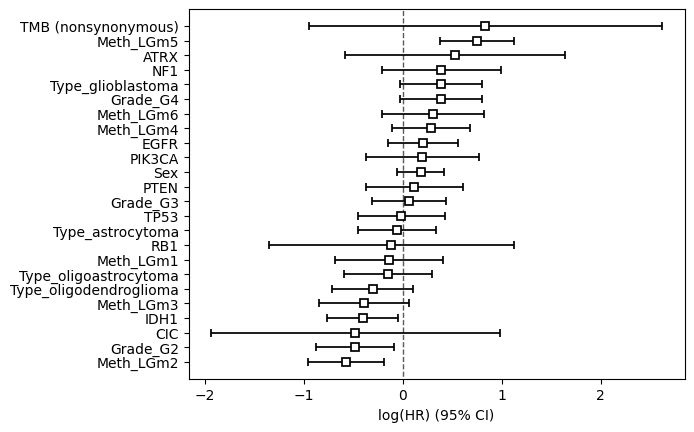

In [109]:
import pandas as pd
from lifelines import CoxPHFitter

# Define the DataFrame with all features for Cox analysis
# Ensure "Overall Survival (Months)" and "Overall Survival Status" are correctly included.
# Drop "Patient ID" as it’s not relevant for the survival model itself.
cox_data = prediction.drop(columns=['Patient ID', 'Diagnosis Age', 'PKHD1', 'LRP2', 'PIK3R1', 'FLG', 'PCLO', 'FUBP1', 'TTN', 'MUC16', 'RYR2', 'NOTCH1',
       'HMCN1']).copy()

# Instantiate the Cox model with Ridge regularization to handle collinearity
cox_model = CoxPHFitter(penalizer=0.1)  # Adjust penalizer value for stronger regularization if needed

# Fit the model with all available features
try:
    cox_model.fit(cox_data, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')
    cox_model.print_summary()  # Display the model summary

    # Plot the coefficients to visualize feature importance
    cox_model.plot()
except Exception as e:
    print(f"An error occurred: {e}")


<lifelines.CoxPHFitter: fitted with 695 total observations, 467 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 695
number of events observed = 228
   partial log-likelihood = -1110.05
         time fit was run = 2024-11-04 17:55:42 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
IDH1                -1.01      0.37      0.23           -1.46           -0.55                0.23                0.57
Grade_G2            -0.86      0.42      0.27           -1.39           -0.33                0.25                0.72
Grade_G4             1.26      3.54      0.22            0.82            1.70                2.28                5.48
Meth_LGm2           -0.66      0.52      0.28           -1.19           -0.12                0.30                0.89
Type_astrocytoma     0.50      1.65      0.25            0.02            0.98                1.02                2.67
TMB (nonsynonymous)  0.51      1.66      1.11           -1.66            2.68                0.19               14.53
TP53                -0.25      0.78      0.25           -0.74            0.24                0.48                1.27

                     cmp to     z      p  -log2(p)
covariate                                         
IDH1                   0.00 -4.36 <0.005     16.22
Grade_G2               0.00 -3.20 <0.005      9.50
Grade_G4               0.00  5.65 <0.005     25.89
Meth_LGm2              0.00 -2.38   0.02      5.86
Type_astrocytoma       0.00  2.04   0.04      4.61
TMB (nonsynonymous)    0.00  0.46   0.65      0.63
TP53                   0.00 -1.00   0.32      1.65
---
Concordance = 0.80
Partial AIC = 2234.11
log-likelihood ratio test = 293.36 on 7 df
-log2(p) of ll-ratio test = 195.33

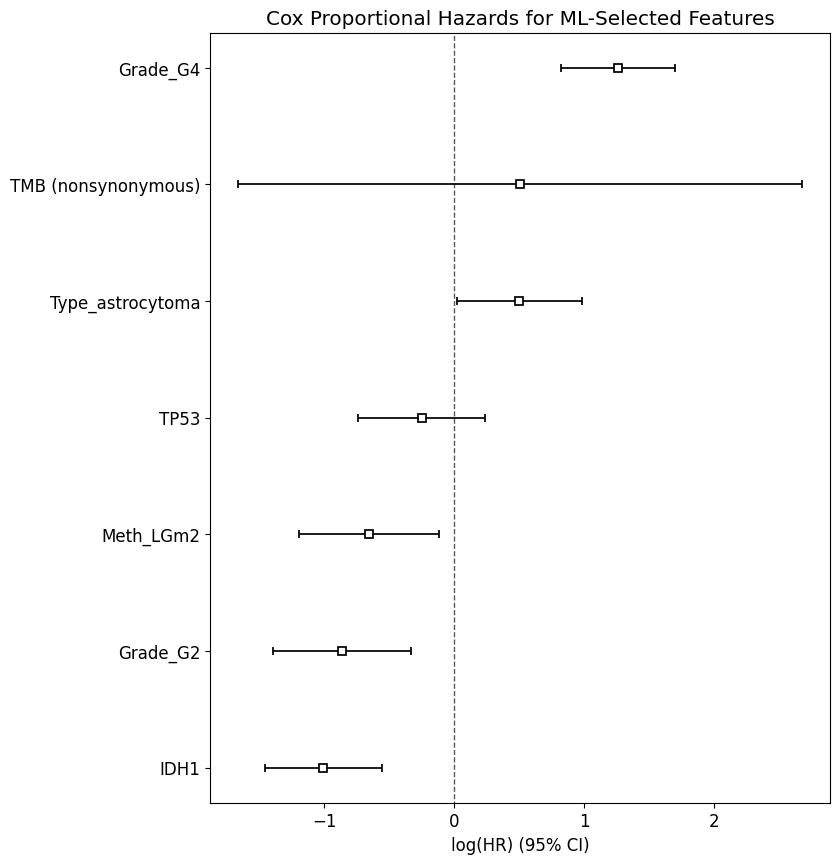

In [113]:
# Exclude 'Patient ID' from ml_features selection
ml_features = prediction[['Overall Survival (Months)', 'Overall Survival Status'] + [col for col in final_selected_features if col != 'Patient ID']]

# Fit Cox model with ML-selected features
cph = CoxPHFitter()
cph.fit(ml_features, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')

# Display coefficients
cph.print_summary()

# Plot hazard ratios
plt.figure(figsize=(8, 10))
#font
plt.rcParams.update({'font.size': 12})
cph.plot()
plt.title("Cox Proportional Hazards for ML-Selected Features")
plt.xlabel("log(HR) (95% CI)")
plt.show()
